# Content:
### <a href="https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/">Suicide Rates Overview 1985 to 2016 </a>
* This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.
* <b>Sources</b>:
<ul> <li><a href="http://hdr.undp.org/en/indicators/137506">United Nations Development Program. (2018). Human development index (HDI). </a> </li>
     <li><a href="http://databank.worldbank.org/data/source/world-development-indicators#">World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. </a> </li>
     <li><a href="https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook">[Szamil]. (2017). Suicide in the Twenty-First Century [dataset] </a></li>
     <li><a href="http://www.who.int/mental_health/suicide-prevention/en/">World Health Organization. (2018). Suicide prevention</a></li> </ul>

# Structure
This notebook is seperated into three parts:
<ol><li>Set-up of the notebook and data</li>
<li>A rough exploration of the Data</li>
<li>Visualizing the Data</li></ol>

## 1. Setup:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# print(plt.style.available)
plt.style.use("seaborn-whitegrid")

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [3]:
df = pd.read_csv(r"C:\Users\JC Jones\Python\Datensets & SQL-Datenbanken\suicide-rates-overview-1985-to-2016\master.csv")

## 2. Data Exploration

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns")

The DataFrame has 27820 rows and 12 columns


### 2.1 Missing values

In [6]:
print("The only column missing values is the HDI column:")
df.isna().sum()

The only column missing values is the HDI column:


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
percent = 100*(df["HDI for year"].isna().sum()/len(df["HDI for year"]))
print(f"% of missing values for HDI: {percent:.2f}")

% of missing values for HDI: 69.94


### 2.2 A first look at the columns

In [8]:
SPACE=25

amount_countries = len(df.country.unique())
first_country, last_country = df.country.unique()[0], df.country.unique()[-1]

start_year, stop_year = df.year.min(), df.year.max()

male, male_num = df.sex.value_counts().index[0], df.sex.value_counts()[0]
female, female_num = df.sex.value_counts().index[1], df.sex.value_counts()[1]

group_amount = len(df.age.unique())
age_groups = df.age.unique()

av_suicides, std_suicides = int(df.suicides_no.mean()), int(df.suicides_no.std())

low_pop, high_pop = df.population.min(), df.population.max()

l_gdp = df["gdp_per_capita ($)"].min()
l_gdp_country = df["year"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].min()].sample(1).values[0]
l_gdp_year = df["country"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].min()].sample(1).values[0]
h_gdp = df["gdp_per_capita ($)"].max()
h_gdp_country = df["year"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].max()].sample(1).values[0]
h_gdp_year = df["country"][df["gdp_per_capita ($)"] == df["gdp_per_capita ($)"].max()].sample(1).values[0]

listed_gens = df.generation.unique()

print("Column country".ljust(SPACE) + f": {amount_countries} unique countrys ranging from {first_country} to {last_country}")
print("Column year".ljust(SPACE) + f": The data begins in the year {start_year} and extends to {stop_year}")
print("Column sex".ljust(SPACE) + f": The dataset contains {male_num} {male}s and {female_num} {female}s")
print("Column age".ljust(SPACE) + f": Is seperated into {group_amount} groups: ")
print(" ".ljust(SPACE + 1), ", ".join(age_groups))
print("Column suicides_no".ljust(SPACE) + f": All countrys together average around {av_suicides} suicides and have a standard deviation of {std_suicides}")
print("Column population".ljust(SPACE) + f": Lowest pop: Kiribati with {low_pop} people")
print(" ".ljust(SPACE + 1), f"Highest pop: United States with {high_pop} people")
print(".".center(SPACE))
print(".".center(SPACE))
print("Column gdp_per_capita ($)".ljust(SPACE) + ": Lowest gdp per capita: ", l_gdp_country, "in",  l_gdp_year, "with", l_gdp)
print(" ".ljust(SPACE + 1), "Highest gdp per capita: ", h_gdp_country, "in",  h_gdp_year, "with", h_gdp)
print("Column generation".ljust(SPACE-1), ":", ", ".join(listed_gens))

Column country           : 101 unique countrys ranging from Albania to Uzbekistan
Column year              : The data begins in the year 1985 and extends to 2016
Column sex               : The dataset contains 13910 males and 13910 females
Column age               : Is seperated into 6 groups: 
                           15-24 years, 35-54 years, 75+ years, 25-34 years, 55-74 years, 5-14 years
Column suicides_no       : All countrys together average around 242 suicides and have a standard deviation of 902
Column population        : Lowest pop: Kiribati with 278 people
                           Highest pop: United States with 43805214 people
            .            
            .            
Column gdp_per_capita ($): Lowest gdp per capita:  1992 in Albania with 251
                           Highest gdp per capita:  2014 in Luxembourg with 126352
Column generation        : Generation X, Silent, G.I. Generation, Boomers, Millenials, Generation Z


## 3. Visualization

### 3.1 Suicides by year for some Countrys

In [9]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


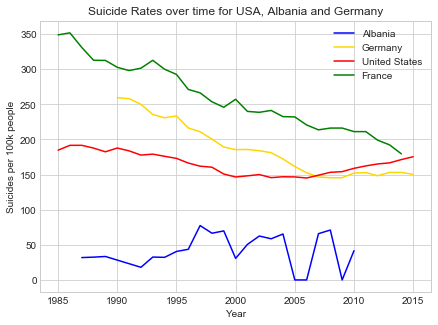

In [10]:
plt.figure(figsize=(7,5))


country_colors = {"Albania": "blue", "Germany": "gold", "United States": "red", "France": "green"}
countries = ["Albania", "Germany", "United States", "France"]
for i in countries:
    country_series =  df.groupby(["country", "year"]).sum().loc[i,"suicides/100k pop"]
    plt.plot(country_series, color=country_colors[i])

plt.legend(["Albania", "Germany", "United States", "France"])
plt.title("Suicide Rates over time for USA, Albania and Germany")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k people")
plt.xticks()
plt.show()

Either Albania had 0 suicides in 2005, 2006 and 2009 or there is an error in the Data. Adittionally, there is no Data for Albania from 2010 onwards.

In [11]:
df[(df["country"]=="Albania")&(df["year"].isin([2005,2006,2009]))].sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
206,Albania,2006,female,35-54 years,0,388746,0.0,Albania2006,NaN,"8,992,642,349",3235,Boomers
204,Albania,2006,female,15-24 years,0,283138,0.0,Albania2006,NaN,"8,992,642,349",3235,Millenials
249,Albania,2009,male,5-14 years,0,253007,0.0,Albania2009,NaN,"12,044,212,904",4387,Generation Z
242,Albania,2009,female,35-54 years,0,394286,0.0,Albania2009,NaN,"12,044,212,904",4387,Boomers
246,Albania,2009,male,15-24 years,0,283448,0.0,Albania2009,NaN,"12,044,212,904",4387,Millenials


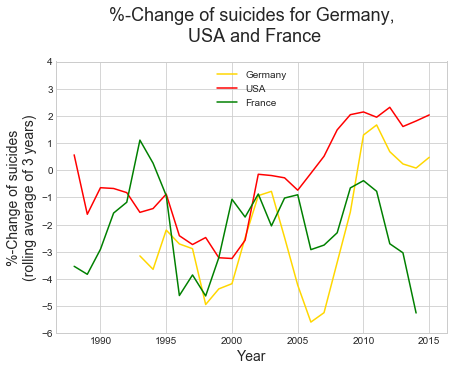

In [135]:
NUM = 3

plt.figure(figsize=(7,5))
countries = ["Germany", "United States", "France"]

for i in countries:
    country_series =  df.groupby(["country", "year"]).sum().loc[i,"suicides/100k pop"]
    country_perc = (country_series/country_series.shift(1)-1).rolling(NUM).mean()*100
    plt.plot(country_perc, color=country_colors[i])


plt.legend(["Germany", "USA", "France"], loc="upper center")
plt.yticks(ticks=np.arange(-6,5))
plt.xlabel("Year", fontdict={"fontsize":14})
plt.ylabel(f"%-Change of suicides\n(rolling average of {NUM} years)", fontdict={"fontsize":14})
plt.title("%-Change of suicides for Germany,\n USA and France", fontdict={"fontsize": 18}, pad=20, loc="center")


plt.show()

<b>Conclusion:</b>
* while <b>France</b> had a higher suicide-Rate per 100k capita to begin with, they managed to <b>steadily decrease</b> their suicide-number.
* <b>Germany</b> on the other hand had <b>a good run between 1990 and 2009</b>. <b>From 2010 onwards</b> its suicide-rate per 100k capita started to <b>slowly increase</b> again.
* The <b>United States</b> started off with a comparably low number of suicides but somewhere <b>between 2005 and 2008</b> their suicide-rate began to <b>increase again</b>.

### 3.2 Suicides for different age-groups in Germany

In [108]:
gdf = df[df.country=="Germany"]

g2015 = gdf.loc[gdf["year"]==2015,]
g2015_suicides = g2015.loc[:,["age", "sex", "suicides/100k pop"]].groupby(["age", "sex"]).sum()
g2015_suicides = g2015_suicides.reindex(["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], level=0)
g2015_suicides_arr = g2015_suicides.values.reshape(6,2)

ratio = []
for i in range(6):
    ratio.append(g2015_suicides_arr[i,1]/g2015_suicides_arr[i,0])

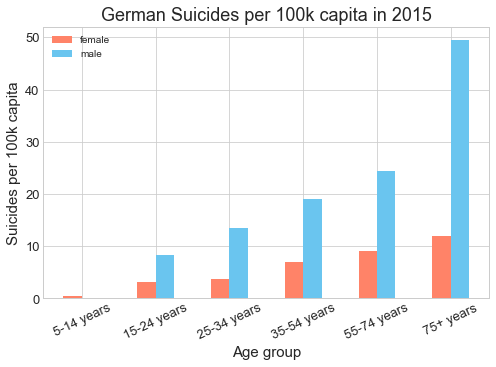

In [87]:
color = {"f": "#ff8368", "m": "#6ac5ef"}

fig=plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=13)

for i in range(0,6):
    plt.bar(i-0.25, g2015_suicides_arr[i,0], color=color["f"],width=0.25, align="edge")
    plt.bar(i, g2015_suicides_arr[i,1], color=color["m"],width=0.25, align="edge")


    
plt.xticks(np.arange(0,6), labels=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], rotation=25)
plt.legend(["female", "male"])
plt.title("German Suicides per 100k capita in 2015", fontdict={"fontsize":18})
plt.xlabel("Age group", fontdict={"fontsize": 15})
plt.ylabel("Suicides per 100k capita", fontdict={"fontsize": 15})
plt.show()

In [132]:
print(f"\n In each but the first age-group, the male suicide-rate is higher than the females': ")
pd.DataFrame(index=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], data={"Ratio of male to female suicides":np.around(ratio, decimals=2)})


 In each but the first age-group, the male suicide-rate is higher than the females': 


,Ratio of male to female suicides
5-14 years,0.43
15-24 years,2.57
25-34 years,3.55
35-54 years,2.78
55-74 years,2.70
75+ years,4.17


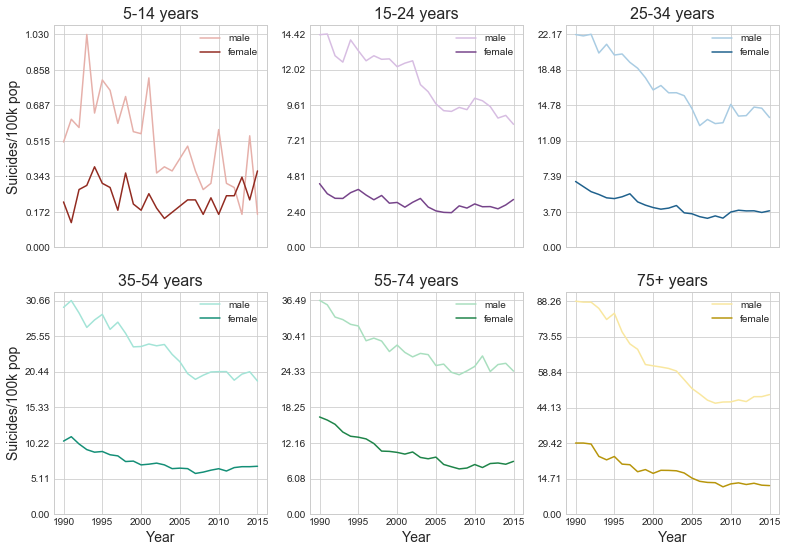

In [101]:
age_groups = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
col = {"5-14 years": {"m":  "#e6b0aa" , "f": "#922b21"}, "15-24 years": {"m": "#d7bde2", "f": "#76448a"}, 
          "25-34 years": {"m": "#a9cce3", "f": "#1f618d"}, "35-54 years": {"m": "#a3e4d7", "f": "#148f77"}, 
          "55-74 years": {"m": "#a9dfbf", "f": "#1e8449"}, "75+ years": {"m": "#f9e79f", "f": "#b7950b"}}

fig, ax = plt.subplots(2,3, figsize=(13,9), sharex=True)
ax = ax.flatten()


for num, age_group in enumerate(age_groups):
    
    condition = (df["age"]==age_group)&(df["country"]=="Germany")
    group_df = df.loc[condition, ["suicides/100k pop", "sex", "year"]]    
    
    y_min, y_max = group_df.year.min(), group_df.year.max()
    timespan = np.arange(y_min, y_max+1)
    
    male_df = group_df.loc[group_df.sex=="male", "suicides/100k pop"]
    female_df = group_df.loc[group_df.sex=="female", "suicides/100k pop"]
    
    ax[num].plot(timespan, male_df, color=col[age_group]["m"])
    ax[num].plot(timespan, female_df, color=col[age_group]["f"])

    ax[num].set_title(age_group, fontdict={"fontsize": 16})
    if num > 2:
        ax[num].set_xlabel("Year", fontdict={"fontsize": 14})
    if num % 3 ==0:
        ax[num].set_ylabel("Suicides/100k pop", fontdict={"fontsize": 14})
    ax[num].legend(["male", "female"])
    ax[num].set_yticks(ticks=np.linspace(0,np.maximum(male_df, female_df).max(),7))

plt.show()

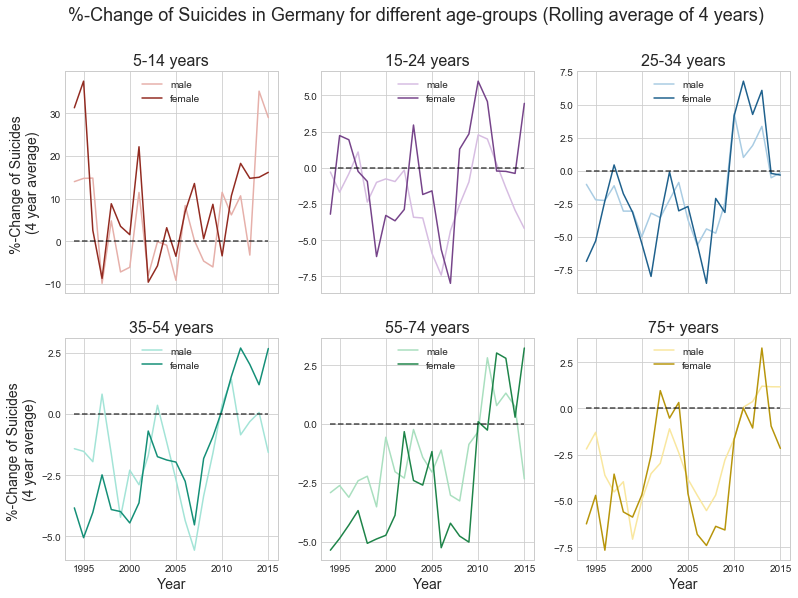

In [82]:
fig, ax = plt.subplots(2,3, figsize=(13,9), sharex=True)
ax = ax.flatten()

ROLL_NUM = 4


for num, age_group in enumerate(age_groups):
    
    condition = (df["age"]==age_group)&(df["country"]=="Germany")
    group_df = df.loc[condition, ["suicides/100k pop", "sex", "year"]]    
    
    male_df = group_df.loc[group_df.sex=="male", "suicides/100k pop"]
    female_df = group_df.loc[group_df.sex=="female", "suicides/100k pop"]
    
    y_min, y_max = group_df.year.min(), group_df.year.max()
    timespan = np.arange(y_min, y_max+1)
    
    ax[num].plot(timespan, ((male_df/male_df.shift(1)-1)*100).rolling(ROLL_NUM).mean(), color=col[age_group]["m"])
    ax[num].plot(timespan, ((female_df/female_df.shift(1)-1)*100).rolling(ROLL_NUM).mean(), color=col[age_group]["f"])

    ax[num].set_title(age_group, fontdict={"fontsize": 16})
    if num > 2:
        ax[num].set_xlabel("Year", fontdict={"fontsize": 14})
    if num % 3 ==0:
        ax[num].set_ylabel(f"%-Change of Suicides \n({ROLL_NUM} year average)", fontdict={"fontsize": 14})
    if num > 0:
        ax[num].set_yticks(np.linspace(-10, 10, 9))
    ax[num].legend(["male", "female"], loc=9)
    
    ax[num].plot([y_min+ROLL_NUM, y_max], [0,0], linestyle="--", color="k", alpha=0.7)

fig.suptitle(f"%-Change of Suicides in Germany for different age-groups (Rolling average of {ROLL_NUM} years)", fontsize=18)
plt.show()